In [1]:
using LightGraphs, Distributions, PyPlot

In [11]:
d = Gamma(1000,0.02)

Distributions.Gamma(α=1000.0, θ=0.02)

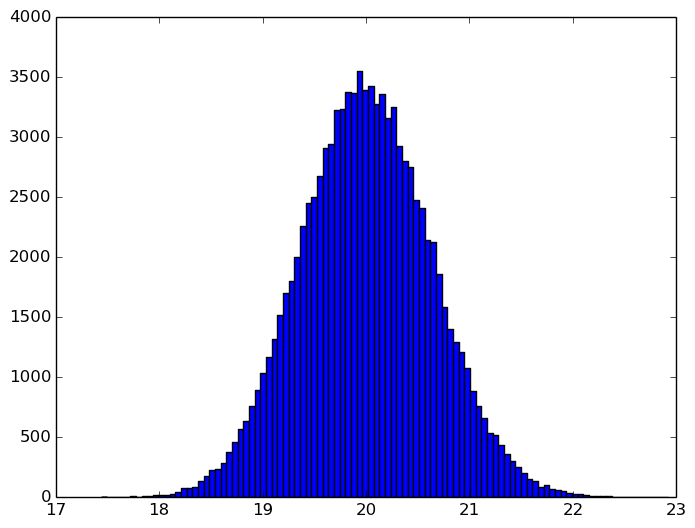

([1.0,2.0,1.0,4.0,1.0,8.0,2.0,13.0,12.0,17.0  …  5.0,7.0,1.0,2.0,1.0,0.0,0.0,2.0,0.0,2.0],[17.4431,17.498,17.5528,17.6076,17.6624,17.7173,17.7721,17.8269,17.8817,17.9366  …  22.432,22.4869,22.5417,22.5965,22.6513,22.7062,22.761,22.8158,22.8706,22.9255],Any[PyObject <matplotlib.patches.Rectangle object at 0x4f32810>,PyObject <matplotlib.patches.Rectangle object at 0x4f32e50>,PyObject <matplotlib.patches.Rectangle object at 0x4f3a510>,PyObject <matplotlib.patches.Rectangle object at 0x4f3ab90>,PyObject <matplotlib.patches.Rectangle object at 0x4f3d250>,PyObject <matplotlib.patches.Rectangle object at 0x4f3d8d0>,PyObject <matplotlib.patches.Rectangle object at 0x4f3df50>,PyObject <matplotlib.patches.Rectangle object at 0x4f41610>,PyObject <matplotlib.patches.Rectangle object at 0x4f41c90>,PyObject <matplotlib.patches.Rectangle object at 0x4f45350>  …  PyObject <matplotlib.patches.Rectangle object at 0x58e7950>,PyObject <matplotlib.patches.Rectangle object at 0x58e7fd0>,PyObject <matplotli

In [12]:
PyPlot.plt[:hist](rand(d,100000),bins=100)

In [4]:
function generate_graph_from_degree_distribution(d::UnivariateDistribution,N::Int)
    g = Graph(N)
    
    max_trials = 10
    trials = 0
    #get valid set of edges
    degrees = sample_degrees(d,N)
    stubs = get_stubs(degrees)
    edges,success = make_valid_edge_set(stubs)
    
    while !success && trials < max_trials
        trials += 1
        degrees = sample_degrees(d,N)
        stubs = get_stubs(degrees)
        edges,success = make_valid_edge_set(stubs)        
    end
    
    if !success
        println("Unable to sample graph, maximum trials exceeded.")
        return g
    end
    #produce graph
    while(!isempty(edges))
        edge = pop!(edges)
        add_edge!(g,edge)
    end
    g
end

function sample_integers(d::UnivariateDistribution,N::Int)
    samples = rand(d,N)
    return [Int(el) for el in round(samples)]
end

function sample_degrees(d::UnivariateDistribution,N::Int)
    degrees = sample_integers(d,N)
    #make sure sum is even
    while sum(degrees) % 2 != 0
        degrees = sample_integers(d,N)
        println("resampled because odd")
    end
    degrees
end

function get_stubs(degrees)
    stubs = Array(Int,sum(degrees))
    idx = 1
    for i = 1:length(degrees)
        for j = 0:degrees[i]-1
            stubs[idx + j] = i
        end
        idx = idx + degrees[i]
    end
    return stubs
end

function connect_stubs(stubs)
    edges = Set{Pair{Int,Int}}()
    while length(stubs) > 0
        connect_stub(stubs,edges)
    end
    return edges
end

function connect_stub(stubs,edges::Set{Pair{Int,Int}})
    first = stubs[end]
    second = stubs[end-1]
    edge = first <= second ? Pair(first,second) : Pair(second,first)
    
    while !edge_is_valid(edge,edges)
        println("reshuffling")
        shuffle!(stubs)
        first = stubs[end]
        second = stubs[end-1]
        edge = first <= second ? Pair(first,second) : Pair(second,first)
    end
    pop!(stubs)
    pop!(stubs)
    push!(edges,edge)
    
    return edge
end

function edge_is_valid(edge::Pair{Int,Int},edges::Set{Pair{Int,Int}})
    if !(edge in edges) && edge[1] != edge[2]
        return true
    end
    return false
end


edge_is_valid (generic function with 1 method)

In [ ]:
sample_degrees(d,10)
PyPlot.plt[:hist](rand(d,100000),bins=20,normed=true,alpha=0.5)
PyPlot.plt[:hist](sample_degrees(d,100000),bins=20,normed=true,alpha=0.5)

In [13]:
g= generate_graph_from_degree_distribution(d,40)

resampled because odd
resampled because odd
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffl

{40, 0} undirected graph

reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
too many reshuffles!
resampled because odd
resampled because odd
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling
reshuffling

In [5]:
N = 20
degrees = sample_degrees(d,N)
stubs = get_stubs(degrees)

resampled because odd


408-element Array{Int64,1}:
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  ⋮
 20
 20
 20
 20
 20
 20
 20
 20
 20
 20
 20
 20

In [ ]:
edges = connect_stubs(stubs)

In [ ]:
stubs

In [6]:
function make_ordered_pair(first::Int,second::Int)
    first <= second ? Pair(first,second) : Pair(second,first)
end

function make_edges(stubs)
    edges = Set{Pair{Int,Int}}()
    for i = 1:Int(length(stubs)/2)
        p = make_ordered_pair(stubs[2*i],stubs[2*i-1])
        push!(edges,p)
    end
    return edges
end

function is_valid_edge_set(stubs,edges)
    #no self-edges, no duplicate edges
    if length(edges) != length(stubs)/2
        return false
    end
    for e in edges
        if e[1] == e[2] return false end
    end
    return true
end

function make_valid_edge_set(stubs,max_reshuffle = 100)
    reshuffled = 0
    edges = make_edges(stubs)
    while !is_valid_edge_set(stubs,edges)
        if reshuffled > max_reshuffle
            println("too many reshuffles!")
            return edges,false
        end
        println("reshuffling")
        shuffle!(stubs)
        edges = make_edges(stubs)
        reshuffled += 1
    end
    return edges,true
end

make_valid_edge_set (generic function with 2 methods)

In [49]:
shuffle!(stubs)
edges = make_edges(stubs)
println(edges)
is_valid_edge_set(stubs,edges)

Set(

false

[edge 6 - 13,edge 7 - 11,edge 6 - 17,edge 6 - 9,edge 8 - 19,edge 13 - 17,edge 12 - 15,edge 18 - 19,edge 14 - 20,edge 7 - 7])


In [56]:
make_valid_edge_set(stubs)

reshuffling


Set([edge 3 - 16,edge 11 - 18,edge 2 - 14,edge 1 - 2,edge 2 - 17,edge 6 - 9,edge 8 - 11,edge 8 - 20,edge 13 - 15,edge 2 - 11,edge 11 - 20,edge 7 - 9,edge 6 - 16])

reshuffling
